In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

df = pd.read_csv("./data/ames.csv")


In [30]:
def cal_mi_score(X, y, discrete_features ):
    mi_score = mutual_info_regression(X, y , discrete_features=discrete_features)
    mi_score = pd.Series(mi_score, name="MI Score", index=X.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score


def calculate_mi_score(X, y):
    for column in X.select_dtypes(include="object").columns:
        X[column], _ = X[column].factorize()
    discrete_features = X.dtypes == 'int64'
    return cal_mi_score(X, y, discrete_features )


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")



def score_dataset(X, y, model=XGBRegressor()):
    for column in X.select_dtypes(include="object").columns:
        X[column], _ = X[column].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score





OverallQual         0.592025
Neighborhood        0.574242
GrLivArea           0.495786
YearBuilt           0.440377
GarageArea          0.419782
                      ...   
LandSlope           0.001944
Utilities           0.000404
MoSold              0.000000
Threeseasonporch    0.000000
PoolQC              0.000000
Name: MI Score, Length: 78, dtype: float64


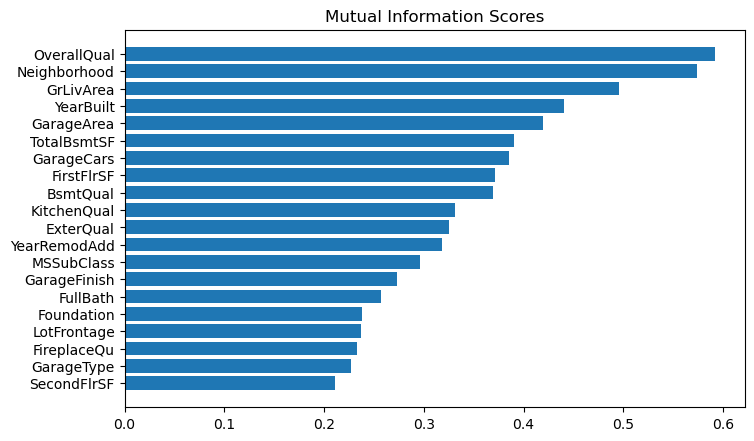

In [31]:
X = df.copy()
y = X.pop("SalePrice")

mi_score = calculate_mi_score(X, y)
print(mi_score)

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_score[0:20])




In [32]:
print("Score with all the columns = ", score_dataset(X,y))
print("Score with top 30 columns = ", score_dataset(X[mi_score.index[:30]],y))
print("Score with top 20 columns = ", score_dataset(X[mi_score.index[:20]],y))
print("Score with top 10 columns = ", score_dataset(X[mi_score.index[:10]],y))

Score with all the columns =  0.14284209833401057
Score with top 30 columns =  0.15104274282712668
Score with top 20 columns =  0.15534614831957974
Score with top 10 columns =  0.16164071476978864


In [33]:
# lets create 3 new features and see if they appearon top etc


X["LivLotRatio"] = X["GrLivArea"] /X["LotArea"] 
X["Spaciousness"] = (X["FirstFlrSF"] + X["SecondFlrSF"] )/X["TotRmsAbvGrd"] 
X["TotalOutsideSF"] = X["WoodDeckSF"] + X["OpenPorchSF"] + X["EnclosedPorch"] + X["Threeseasonporch"] + X["ScreenPorch"]

OverallQual         0.578822
Neighborhood        0.572829
GrLivArea           0.495325
YearBuilt           0.439558
GarageArea          0.416646
                      ...   
MoSold              0.000000
LandSlope           0.000000
PoolArea            0.000000
Utilities           0.000000
Threeseasonporch    0.000000
Name: MI Score, Length: 81, dtype: float64


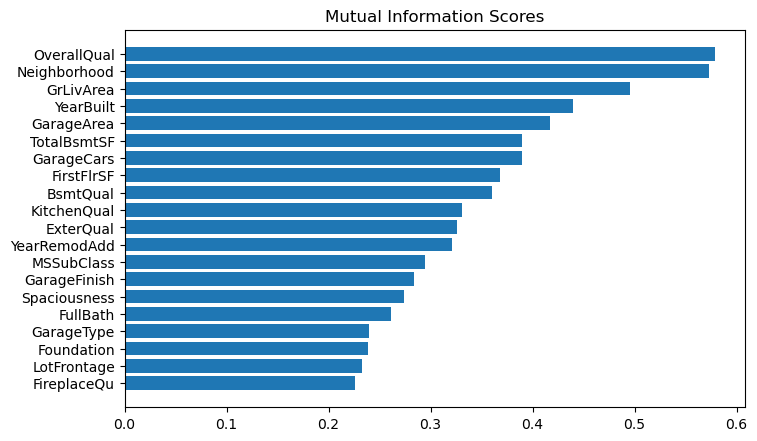

In [34]:
mi_score = calculate_mi_score(X, y)
print(mi_score)

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_score[0:20])


In [35]:
print(mi_score["LivLotRatio"])
print(mi_score["Spaciousness"])
print(mi_score["TotalOutsideSF"])

0.10836558072009872
0.2741269556341841
0.12689072426620474


In [36]:
print("Score with all the columns = ", score_dataset(X,y))
print("Score with top 30 columns = ", score_dataset(X[mi_score.index[:30]],y))
print("Score with top 20 columns = ", score_dataset(X[mi_score.index[:20]],y))
print("Score with top 10 columns = ", score_dataset(X[mi_score.index[:10]],y))

Score with all the columns =  0.14260821232108753
Score with top 30 columns =  0.15148870339095133
Score with top 20 columns =  0.15528465986837497
Score with top 10 columns =  0.16164071476978864


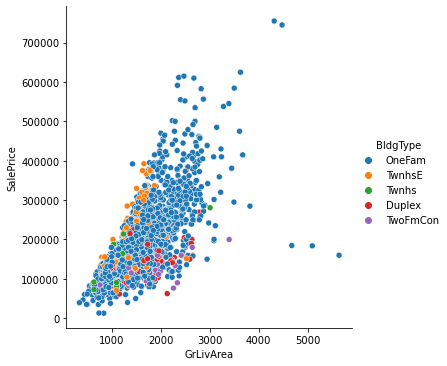

In [41]:
# interaction between `BldgType` and `GrLivArea`


sns.relplot(x="GrLivArea", y="SalePrice", hue="BldgType", data=df);


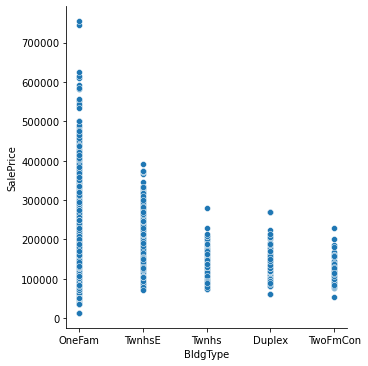

In [39]:
sns.relplot(x="BldgType", y="SalePrice", data=df);

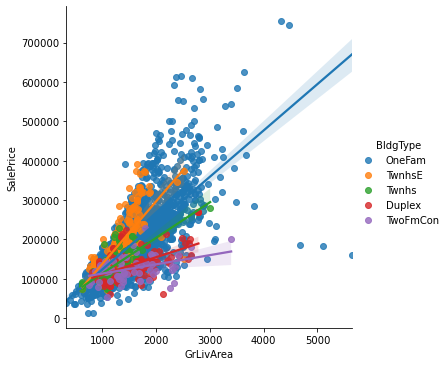

In [40]:
sns.lmplot(x="GrLivArea", y="SalePrice", hue="BldgType", data=df);

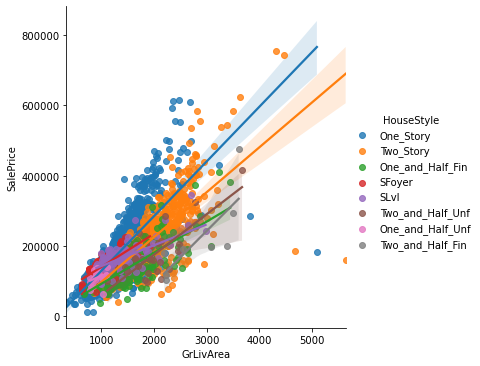

In [42]:
sns.lmplot(x="GrLivArea", y="SalePrice", hue="HouseStyle", data=df); 

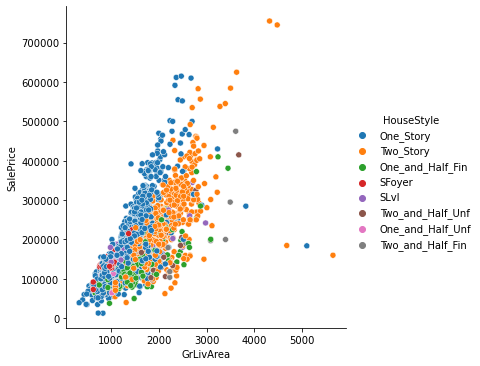

In [43]:
sns.relplot(x="GrLivArea", y="SalePrice", hue="HouseStyle", data=df);


In [44]:
X_2 = pd.get_dummies(df.BldgType, prefix="Bldg")

In [59]:
X_2[80:90]

,Bldg_Duplex,Bldg_OneFam,Bldg_Twnhs,Bldg_TwnhsE,Bldg_TwoFmCon
80,0.0,1097.0,0.0,0.0,0.0
81,0.0,1564.0,0.0,0.0,0.0
82,0.0,1012.0,0.0,0.0,0.0
83,1902.0,0.0,0.0,0.0,0.0
84,0.0,1155.0,0.0,0.0,0.0
85,0.0,894.0,0.0,0.0,0.0
86,0.0,900.0,0.0,0.0,0.0
87,0.0,1040.0,0.0,0.0,0.0
88,0.0,1040.0,0.0,0.0,0.0
89,0.0,1494.0,0.0,0.0,0.0


In [72]:
X["Bldg_Duplex"] = X_2["Bldg_Duplex"]
X["Bldg_OneFam"] = X_2["Bldg_OneFam"]
X["Bldg_Twnhs"] = X_2["Bldg_Twnhs"]
X["Bldg_TwnhsE"] = X_2["Bldg_TwnhsE"]
X["Bldg_TwoFmCon"] = X_2["Bldg_TwoFmCon"]

In [73]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,LivLotRatio,Spaciousness,TotalOutsideSF,Bldg_Duplex,Bldg_OneFam,Bldg_Twnhs,Bldg_TwnhsE,Bldg_TwoFmCon
0,0,0,141.0,31770.0,0,0,0,0,0,0,...,0,0,0.052125,236.571429,272.0,0.0,1656.0,0.0,0.0,0.0
1,0,1,80.0,11622.0,0,0,1,0,0,1,...,0,0,0.077095,179.200000,260.0,0.0,896.0,0.0,0.0,0.0
2,0,0,81.0,14267.0,0,0,0,0,0,0,...,0,0,0.093152,221.500000,429.0,0.0,1329.0,0.0,0.0,0.0
3,0,0,93.0,11160.0,0,0,1,0,0,0,...,0,0,0.189068,263.750000,0.0,0.0,2110.0,0.0,0.0,0.0
4,1,0,74.0,13830.0,0,0,0,0,0,1,...,0,0,0.117787,271.500000,246.0,0.0,1629.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,0,37.0,7937.0,0,0,0,0,0,2,...,0,0,0.126370,167.166667,120.0,0.0,1003.0,0.0,0.0,0.0
2926,0,0,0.0,8885.0,0,0,0,3,0,1,...,0,0,0.101519,180.400000,164.0,0.0,902.0,0.0,0.0,0.0
2927,4,0,62.0,10441.0,0,0,1,0,0,1,...,0,0,0.092903,161.666667,112.0,0.0,970.0,0.0,0.0,0.0
2928,0,0,77.0,10010.0,0,0,1,0,0,1,...,0,0,0.138761,231.500000,278.0,0.0,1389.0,0.0,0.0,0.0


OverallQual     0.586191
Neighborhood    0.572130
GrLivArea       0.495447
Bldg_OneFam     0.474382
YearBuilt       0.439050
GarageArea      0.416826
GarageCars      0.393934
TotalBsmtSF     0.390896
BsmtQual        0.374601
FirstFlrSF      0.373069
KitchenQual     0.327827
ExterQual       0.327374
YearRemodAdd    0.315319
MSSubClass      0.290365
GarageFinish    0.276036
Spaciousness    0.273915
FullBath        0.260577
GarageType      0.234971
Foundation      0.232161
LotFrontage     0.228880
FireplaceQu     0.223751
SecondFlrSF     0.206393
TotRmsAbvGrd    0.189333
OpenPorchSF     0.181683
Exterior2nd     0.179688
BsmtFinType1    0.178505
BsmtFinSF1      0.178304
Fireplaces      0.175339
Exterior1st     0.174230
HeatingQC       0.172585
Name: MI Score, dtype: float64


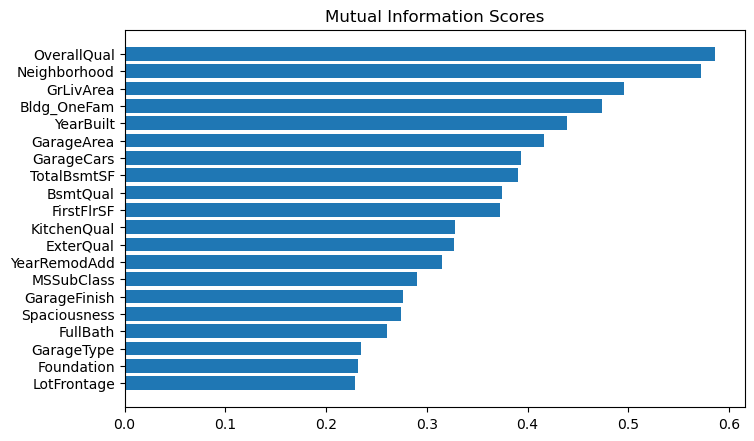

In [75]:
mi_score = calculate_mi_score(X, y)
print(mi_score[0:30])

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_score[0:20])


In [76]:
print("Score with all the columns = ", score_dataset(X,y))
print("Score with top 30 columns = ", score_dataset(X[mi_score.index[:30]],y))
print("Score with top 20 columns = ", score_dataset(X[mi_score.index[:20]],y))
print("Score with top 10 columns = ", score_dataset(X[mi_score.index[:10]],y))

Score with all the columns =  0.14002839943715115
Score with top 30 columns =  0.15096921657530432
Score with top 20 columns =  0.1588133555776006
Score with top 10 columns =  0.15927427052547768


In [78]:
X.WoodDeckSF.gt(0)

0        True
1        True
2        True
3       False
4        True
        ...  
2925     True
2926     True
2927     True
2928     True
2929     True
Name: WoodDeckSF, Length: 2930, dtype: bool

In [79]:
X.OpenPorchSF.gt(0)

0        True
1       False
2        True
3       False
4        True
        ...  
2925    False
2926    False
2927     True
2928     True
2929     True
Name: OpenPorchSF, Length: 2930, dtype: bool

In [81]:
X.WoodDeckSF.gt(0).add(X.OpenPorchSF.gt(0))

0        True
1        True
2        True
3       False
4        True
        ...  
2925     True
2926     True
2927     True
2928     True
2929     True
Length: 2930, dtype: bool

In [97]:
components = [ "OpenPorchSF", "WoodDeckSF", "EnclosedPorch", "Threeseasonporch", "ScreenPorch"]
X["PorchTypes"]=X[components].gt(0).sum(axis=1)

In [99]:
X[components].gt(0).sum(axis=0)

OpenPorchSF         1630
WoodDeckSF          1404
EnclosedPorch        459
Threeseasonporch      37
ScreenPorch          256
dtype: int64

In [94]:
mi_score = calculate_mi_score(X, y)
print(mi_score["PorchTypes"])
print(mi_score["OpenPorchSF"])
print(mi_score["WoodDeckSF"])
print(mi_score["EnclosedPorch"])
print(mi_score["Threeseasonporch"])
print(mi_score["ScreenPorch"])


0.137852817476116
0.18836020193511516
0.11353678071668938
0.04534067757849125
0.0
0.009691013731405906


In [115]:
df.MSSubClass.str.split(pat="_",n=1, expand=True)[0]

0         One
1         One
2         One
3         One
4         Two
        ...  
2925    Split
2926      One
2927    Split
2928      One
2929      Two
Name: 0, Length: 2930, dtype: object

In [119]:
X["MedNhbdArea"]  = df.groupby("Neighborhood")["GrLivArea"].transform("mean")

In [120]:
X["MedNhbdArea"]

0       1292.054176
1       1292.054176
2       1292.054176
3       1292.054176
4       1620.896970
           ...     
2925    1327.991228
2926    1327.991228
2927    1327.991228
2928    1327.991228
2929    1327.991228
Name: MedNhbdArea, Length: 2930, dtype: float64

OverallQual     0.585408
Neighborhood    0.574187
MedNhbdArea     0.532823
GrLivArea       0.496111
Bldg_OneFam     0.468725
YearBuilt       0.436523
GarageArea      0.415049
TotalBsmtSF     0.390006
GarageCars      0.389074
FirstFlrSF      0.371823
BsmtQual        0.365213
ExterQual       0.325928
KitchenQual     0.323453
YearRemodAdd    0.315124
MSSubClass      0.298100
GarageFinish    0.274772
Spaciousness    0.274544
FullBath        0.263885
Foundation      0.241249
LotFrontage     0.236635
GarageType      0.225648
FireplaceQu     0.224180
SecondFlrSF     0.209440
TotRmsAbvGrd    0.194771
OpenPorchSF     0.180877
Fireplaces      0.176526
BsmtFinSF1      0.176026
Exterior1st     0.174406
Exterior2nd     0.173838
BsmtFinType1    0.169731
Name: MI Score, dtype: float64


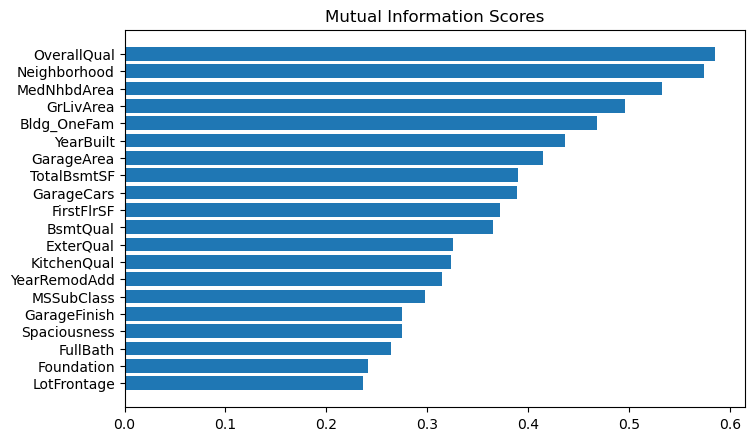

In [121]:
mi_score = calculate_mi_score(X, y)
print(mi_score[0:30])

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_score[0:20])

In [122]:
print("Score with all the columns = ", score_dataset(X,y))
print("Score with top 30 columns = ", score_dataset(X[mi_score.index[:30]],y))
print("Score with top 20 columns = ", score_dataset(X[mi_score.index[:20]],y))
print("Score with top 10 columns = ", score_dataset(X[mi_score.index[:10]],y))

Score with all the columns =  0.14198215597741518
Score with top 30 columns =  0.15140702124636443
Score with top 20 columns =  0.15224329251961286
Score with top 10 columns =  0.15864969089026812


In [ ]:
Score with all the columns =  0.14002839943715115
Score with top 30 columns =  0.15096921657530432
Score with top 20 columns =  0.1588133555776006
Score with top 10 columns =  0.15927427052547768